##Read the Cognite Learn content before running code examples.

##1. Environment Set Up

###Install the Cognite SDK package

If you recieve the errors:

`ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.`

`ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.`

You can disregard them and do not need to click "Restart Runtime".

In [2]:
!pip install cognite-sdk
!pip install cognite-sdk --upgrade
!pip install cognite-sdk-core

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 186 kB 13.9 MB/s 
     |████████████████████████████████| 1.0 MB 56.0 MB/s 
     |████████████████████████████████| 16.7 MB 56.3 MB/s 
     |████████████████████████████████| 6.3 MB 38.7 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 186 kB 13.7 MB/s 
  Attempting uninstall: requests-oauthlib
    Found existing installation: requests-oauthlib 1.3.1
    Uninstalling requests-oauthlib-1.3.1:
      Successfully uninstalled requests-oauthlib-1.3.1


###Install the MSAL




In [4]:
!pip install msal

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 83 kB 1.6 MB/s 
     |████████████████████████████████| 4.0 MB 32.1 MB/s 


### Connect to Cognite Data Fusion
This client object is how all queries will be sent to the Cognite API to retrieve data.

For successfully retrieving the Cognite API, sign in with your user credentials linked to the Azure AD group. For publicdata, your user credentials are the same as you use to sign in to Cognite Hub and Cognite Learn.

In [5]:
from cognite.client import CogniteClient
from msal import PublicClientApplication
# Contact Project Administrator to get these
TENANT_ID = '48d5043c-cf70-4c49-881c-c638f5796997'
CLIENT_ID = '1b90ede3-271e-401b-81a0-a4d52bea3273'
CDF_CLUSTER = 'api' # api, westeurope-1 etc
COGNITE_PROJECT = 'publicdata'
SCOPES = [f'https://{CDF_CLUSTER}.cognitedata.com/.default']
AUTHORITY_HOST_URI = 'https://login.microsoftonline.com'
AUTHORITY_URI = AUTHORITY_HOST_URI + '/' + TENANT_ID
app = PublicClientApplication(client_id=CLIENT_ID, authority=AUTHORITY_URI)
def authenticate_device_code(app):
  # Firstly, check the cache to see if this end user has signed in before
  accounts = app.get_accounts()
  if accounts:
    creds = app.acquire_token_silent(SCOPES, account=accounts[0])
  else:
    device_flow = app.initiate_device_flow(scopes=SCOPES)
    print(device_flow['message']) # print device code to screen
    creds = app.acquire_token_by_device_flow(flow=device_flow)
  return creds
def get_token():
  return authenticate_device_code(app)['access_token']
client = CogniteClient(
  token_url=f'{AUTHORITY_URI}/v2.0',
  token=get_token,
  token_client_id=CLIENT_ID,
  project=COGNITE_PROJECT,
  base_url=f'https://{CDF_CLUSTER}.cognitedata.com',
  client_name='cognite-python-dev',
)
print(client.iam.token.inspect())

To sign in, use a web browser to open the page https://microsoft.com/devicelogin and enter the code C97ST9D7Z to authenticate.
{
    "subject": "Eabg9uvifsehlZgdnKWiwO4B3tIFa8ibqW6bTkviTjE",
    "projects": [
        {
            "url_name": "publicdata",
            "groups": [
                4860375157547584,
                5824342682088767
            ]
        }
    ],
    "capabilities": [
        {
            "groupsAcl": {
                "version": 1,
                "actions": [
                    "LIST"
                ],
                "scope": {
                    "currentuserscope": {}
                }
            },
            "projectScope": {
                "projects": [
                    "publicdata"
                ]
            }
        },
        {
            "assetsAcl": {
                "version": 1,
                "actions": [
                    "READ"
                ],
                "scope": {
                    "all": {}
                }
 

##2. Retrieving Lists of Assets

###List assets
The `client.assets.list(limit=20)` function retrieves the first `limit` assets, and returns it as an `AssetList`.

In [4]:
client.assets.list(limit=20)

,external_id,name,parent_id,parent_external_id,description,metadata,id,created_time,last_updated_time,root_id
0,WMT:23-TE-96116-04,23-TE-96116-04,3117826349444493,WMT:23-DB-9101,VRD - PH 1STSTGGEAR THRUST BRG OUT,"{'ELC_STATUS_ID': '1211', 'RES_ID': '525283', ...",702630644612,0,1659105542151,6687602007296940
1,WMT:23-TE-96148,23-TE-96148,8515799768286580,WMT:23-TT-96148,VRD - PH 1STSTG COMP SEAL GAS HTR,"{'ELC_STATUS_ID': '1211', 'RES_ID': '532924', ...",5156972057719,0,1659105542254,6687602007296940
2,WMT:23-YT-96117-01,23-YT-96117-01,3257705896277160,WMT:23-YE-96117-01,VRD - PH 1STSTGGEAR 1 JOURNBRG DE,"{'ELC_STATUS_ID': '1211', 'RES_ID': '446683', ...",8019487489463,0,1659105542348,6687602007296940
3,WMT:23-FI-96151,23-FI-96151,4239585628663887,WMT:23-FT-96151,SOFT TAG VRD - PH 1STSTG PRIM SEAL LEAK DE,"{'ELC_STATUS_ID': '1211', 'SOURCE_DB': 'workma...",9258567430091,0,1659105542441,6687602007296940
4,WMT:23-LT-92521,23-LT-92521,2069232457199305,WMT:23-LV-92521A,VRD - PH 1STSTGSUCTSCRUBBER LEVEL,"{'ELC_STATUS_ID': '1211', 'RES_ID': '523206', ...",12670864495024,0,1659105542519,6687602007296940
5,WMT:23-EZSM-92501A,23-EZSM-92501A,576308321452985,WMT:23-ESDV-92501A,VRD - PH 1STSTGSUCTCLR GAS IN,"{'ELC_STATUS_ID': '1211', 'RES_ID': '145665', ...",13001911877650,0,1659105542602,6687602007296940
6,WMT:23-TAHH-96115-01,23-TAHH-96115-01,1491649372046525,WMT:23-TE-96115-01,VRD - PH 1STSTGGEAR THRUST BRG IN : TEMPERATUR...,"{'ELC_STATUS_ID': '1211', 'SOURCE_DB': 'workma...",26731253648529,0,1659105542685,6687602007296940
7,WMT:23-LEX-92529,23-LEX-92529,1081261865374641,WMT:23-LE-92529,VRD - PH 1STSTGSCRUB I-FACE,"{'ELC_STATUS_ID': '1211', 'SOURCE_DB': 'workma...",38840252674561,0,1659105542762,6687602007296940
8,WMT:23-TE-96131-01,23-TE-96131-01,6191827428964450,WMT:23-KA-9101-M01,VRD - PH 1STSTG MOTOR JOURN BRG NDE,"{'ELC_STATUS_ID': '1211', 'SOURCE_DB': 'workma...",40737621439156,0,1659105542857,6687602007296940
9,WMT:23-FO-96188,23-FO-96188,2357112351749647,WMT:23-TX-9103,VRD - PH 1STSTG LUBE OIL PURGE GAS,"{'ELC_STATUS_ID': '1211', 'SOURCE_DB': 'workma...",49184996243859,0,1659105542946,6687602007296940


##Search Assets##
The `client.assets.search()` function allows you to search by a specific property of the asset, including its name, parent, etc.

###Fuzzy Search by name
The search by name includes results that are similar in name, but not an exact match.

In [6]:
asset_name = "23-TE-96148"
assets = client.assets.search(name=asset_name)
assets[:5]

,external_id,name,parent_id,parent_external_id,description,metadata,id,created_time,last_updated_time,root_id
0,WMT:23-TE-96148,23-TE-96148,8515799768286580,WMT:23-TT-96148,VRD - PH 1STSTG COMP SEAL GAS HTR,"{'ELC_STATUS_ID': '1211', 'RES_ID': '532924', ...",5156972057719,0,1659105542254,6687602007296940
1,WMT:23-TE-96147,23-TE-96147,2539007469802785,WMT:23-FE-9122,VRD - COMPRESSOR SEAL GAS HEATER TEMPERATURE,"{'ELC_STATUS_ID': '1225', 'SOURCE_DB': 'workma...",6807309360116750,0,1659105611871,6687602007296940
2,WMT:23-TE-96168,23-TE-96168,7080547672061222,WMT:23-TT-96168,VRD - PH 1STSTG COMP INNER SEAL,"{'ELC_STATUS_ID': '1211', 'RES_ID': '662266', ...",3954631603440339,0,1659105582658,6687602007296940
3,WMT:23-TI-96148,23-TI-96148,8515799768286580,WMT:23-TT-96148,VRD PH,"{'ELC_STATUS_ID': '1225', 'SOURCE_DB': 'workma...",4965081560013210,0,1659105593400,6687602007296940
4,WMT:23-TT-96148,23-TT-96148,2539007469802785,WMT:23-FE-9122,VRD - PH 1STSTG COMP SEAL GAS HTR,"{'ELC_STATUS_ID': '1211', 'RES_ID': '496823', ...",8515799768286580,0,1659105628235,6687602007296940


In [6]:
type(assets)

cognite.client.data_classes.assets.AssetList

###Specific Search
The `client.assets.retrieve()` interface provides the same information for one specific asset based on the provided ID or external ID.

In [7]:
asset_id = [a.id for a in assets if a.name==asset_name][0]
client.assets.retrieve(id=asset_id)

,value
external_id,WMT:23-TE-96148
name,23-TE-96148
parent_id,8515799768286580
parent_external_id,WMT:23-TT-96148
description,VRD - PH 1STSTG COMP SEAL GAS HTR
id,5156972057719
created_time,0
last_updated_time,1659105542254
root_id,6687602007296940
ELC_STATUS_ID,1211


In [8]:
[a.id for a in assets if a.name==asset_name]

[5156972057719]

##3. Events


Like we did for assets, we can list events. We will not go more in depth on events here, but you can also filter and search for events. 

In [9]:
client.events.list(limit=7)

,external_id,type,subtype,metadata,asset_ids,source,id,last_updated_time,created_time,description
0,DWH.Primavera_task_2748143,***,VAL,"{'lastUpdatedTime': '2020-07-21 13:07:00.747',...",[4650652196144007],akerbp-cdp,1974905911,1601370080806,1601370080806,NaN
1,CoW_ISP_IL-0041929_2.0,*** ***,*** ***,"{'source': 'akerbp-cdp', 'sourceId': '13910501...",[4650652196144007],akerbp-cdp,1541758092526,1642396189478,1642396189478,NaN
2,NaN,cognite_annotation,pnid_annotation,"{'CDF_ANNOTATION_box': '{""xMax"":0.832560951037...",NaN,job:7980716843008797,1826154693604,1659342471636,1607641077982,23-1ST STAGE COMPRESSOR-PH
3,DWH.Primavera_task_2566427,***,VAL,"{'sourceId': '7890156290311553', 'lastUpdatedT...",[4650652196144007],akerbp-cdp,1849922630720,1625756581493,1610996543380,NaN
4,CoW_ISL_IL-0026222,*** ***,*** ***,"{'lastUpdatedTime': '2021-04-30 15:35:59.182',...",[4650652196144007],akerbp-cdp,1955188068034,1620641763956,1620641763956,NaN
5,NaN,***,Valhall,"{'source': 'akerbp-cdp', 'sourceId': '83574887...",[4650652196144007],akerbp-cdp,1995162693488,1538252247102,1538252247102,NaN
6,CoW_ISP_IL-0039688_19.0,*** ***,*** ***,"{'source': 'akerbp-cdp', 'sourceId': '24039945...",[4650652196144007],akerbp-cdp,2028204839184,1645434775569,1645434775569,NaN


In [11]:
client.events.retrieve(external_id="DWH.Primavera_task_2566535")

,value
external_id,DWH.Primavera_task_2566535
type,***
subtype,VAL
asset_ids,[4650652196144007]
source,akerbp-cdp
id,14724046590280
last_updated_time,1625756573530
created_time,1610996539692
sourceId,7112618453384108
lastUpdatedTime,2021-06-10 08:10:09.776


##4. Asset Hierarchy and Relationships

We will generate a list of all children of the main asset of interest. The main asset of interest is listed first, then the children are listed underneath in following rows.

In [12]:
subtree = client.assets.retrieve_subtree(id=4650652196144007)
subtree[:5]

,external_id,name,parent_id,parent_external_id,description,metadata,id,created_time,last_updated_time,root_id
0,WMT:VAL,VAL,6687602007296940,WMT:Aker BP,Valhall plattform,"{'SOURCE_DB': 'workmate', 'SOURCE_TABLE': 'wma...",4650652196144007,0,1663855311132,6687602007296940
1,WMT:23,23,4650652196144007,WMT:VAL,GAS COMPRESSION AND RE-INJECTION (PH),"{'SOURCE_DB': 'workmate', 'SOURCE_TABLE': 'wma...",3111454725058294,0,1659105573617,6687602007296940
2,WMT:230900,230900,3111454725058294,WMT:23,GAS COMPRESSION AND RE-INJECTION ON PH,"{'ELC_STATUS_ID': '1211', 'SOURCE_DB': 'workma...",6895991969886325,0,1659105612482,6687602007296940
3,WMT:23-TT-92604B,23-TT-92604B,6895991969886325,WMT:230900,VRD - PH 1STSTGDISCCOOL COOLMED IN,"{'ELC_STATUS_ID': '1212', 'SOURCE_DB': 'workma...",1150715783816357,0,1659105553538,6687602007296940
4,WMT:23-1ST STAGE COMPRESSION-PH,23-1ST STAGE COMPRESSION-PH,6895991969886325,WMT:230900,1ST STAGE COMPRESSION ON PH,"{'ELC_STATUS_ID': '1211', 'SOURCE_DB': 'workma...",4518112062673878,0,1659105588987,6687602007296940


In [14]:
sub2= client.assets.retrieve_subtree(id=5482096081057609)
sub2[:10]

,external_id,name,parent_id,parent_external_id,description,metadata,id,created_time,last_updated_time,root_id
0,WMT:23-FT-92537-01,23-FT-92537-01,976052247321041,WMT:23-FE-92537,VRD - PH 1STSTGCOMP DISCHARGE,"{'ELC_STATUS_ID': '1211', 'RES_ID': '500779', ...",5482096081057609,0,1659105597837,6687602007296940
1,WMT:23-FI-92537-01,23-FI-92537-01,5482096081057609,WMT:23-FT-92537-01,SOFT TAG VRD - PH 1STSTGCOMP DISCHARGE,"{'ELC_STATUS_ID': '1211', 'SOURCE_DB': 'workma...",3117637584998557,0,1659105573791,6687602007296940


##5. Collecting Time Series Data

###Compile a list of time series objects under the asset
For each of the assets in the subtree we retrieved, we get the associated time series objects and merge them into a single `TimeSeriesList` object.

In [15]:
all_timeseries = subtree.time_series()
print(len(all_timeseries),'time series in subtree')
all_timeseries[:5]

363 time series in subtree


,id,external_id,name,is_string,metadata,asset_id,is_step,description,security_categories,created_time,last_updated_time
0,12378169571900,pi:161021,VAL_23-YA-96118-02:Z.X.Value,False,"{'tag': 'VAL_23-YA-96118-02:Z.X.Value', 'scan'...",3111454725058294,False,PH 1stStg Gear1 Journ BRG NDE,[],1593024714298,1593512902300
1,62243813742212,pi:161024,VAL_23-YA-96120-01:Z.X.Value,False,"{'tag': 'VAL_23-YA-96120-01:Z.X.Value', 'scan'...",3111454725058294,False,PH 1stStg Gear2 Journ BRG DE,[],1593024714298,1593512903356
2,75475333173539,pi:160920,VAL_23-TT-96115-01:Z.X.Value,False,"{'tag': 'VAL_23-TT-96115-01:Z.X.Value', 'scan'...",3111454725058294,False,PH 1stStg Gear Thrust BRG IN,[],1593024714298,1593512891075
3,75873560338797,pi:160574,VAL_23-LY-92529_SILch0_SC0_TYSP:VALUE,False,{'tag': 'VAL_23-LY-92529_SILch0_SC0_TYSP:VALUE...,1081261865374641,False,PH (Profiler) Shutdown Channel 0 - Tube y Setp...,[],1593024714298,1593512840510
4,138649441615650,pi:160061,VAL_23_FT_92537_03:Z.X.Value,False,"{'tag': 'VAL_23_FT_92537_03:Z.X.Value', 'scan'...",3111454725058294,False,PH 1stStgComp Flow,[],1593024714298,1593512914895


If you are curious about which asset a time series is attached to, you can retrieve more information of the asset by using the retrieve function. Note that the property is called `asset_id` following typical python style, while `assetId` is used in the underlying API objects and tabular outputs.

In [20]:
client.assets.retrieve(id=all_timeseries[0].asset_id)

,value
external_id,WMT:23
name,23
parent_id,4650652196144007
parent_external_id,WMT:VAL
description,GAS COMPRESSION AND RE-INJECTION (PH)
id,3111454725058294
created_time,0
last_updated_time,1659105573617
root_id,6687602007296940
SOURCE_DB,workmate


###View datapoints for specific time series
The identifier to retrieve Datapoints is the externalId column from the output above.

In [27]:
client.datapoints.retrieve(external_id="pi:160184", start="8d-ago", end="now")

,pi:160184
2022-09-14 14:34:32.212,167881.734375
2022-09-14 14:34:42.214,169716.734375
2022-09-14 14:34:51.719,168788.203125
2022-09-14 14:35:02.210,168704.171875
2022-09-14 14:35:12.727,168004.984375
...,...
2022-09-15 14:29:23.902,156347.953125
2022-09-15 14:29:33.894,156824.515625
2022-09-15 14:29:43.894,152163.218750
2022-09-15 14:29:53.896,149577.312500


##6. Use Cases of CDF Data

###Collect datapoints from CDF
The time series names are defined in the in_ts_exids and out_ts_exid lists below.

In [28]:
in_ts_exids = ["pi:160182", "pi:160697", "pi:160882"]
out_ts_exid = "pi:160696"

###Retrieve Data Points from CDF
Most object types in the Python SDK have a `to_pandas` method which converts the result to a pandas dataframe. For retrieving aggregates such as the average over each time period, you can use `client.datapoints.retrieve_dataframe` to get a pandas dataframe directly. 

In [61]:
ts_exids = in_ts_exids + [out_ts_exid]
from datetime import datetime, timedelta
train_start_date = datetime(2018, 8, 1)

train_end_date = train_start_date + timedelta(days=30)

datapoints_df = client.datapoints.retrieve_dataframe(external_id=ts_exids,
                                                     aggregates=['average'],
                                                     granularity='1m',
                                                     start=train_start_date,
                                                     end=train_end_date,
                                                     include_aggregate_name=False
                                                     )
datapoints_df.fillna(method="ffill", inplace=True)
datapoints_df.head()

,pi:160182,pi:160697,pi:160882,pi:160696
2018-08-01 00:00:00,91120.918480,3.374376,44.184863,3.251437
2018-08-01 00:01:00,86259.975220,3.395966,44.232420,3.274299
2018-08-01 00:02:00,90750.665657,3.410101,44.161438,3.287578
2018-08-01 00:03:00,91948.525170,3.358822,43.986025,3.237081
2018-08-01 00:04:00,93779.111997,3.429458,43.797913,3.306391


There are also shortcuts for filling the dataframe when using interpolation or count aggregates. Note that without the `include_aggregate_name=False` option, the aggregate name is appended to the external id to form a unique column name.

In [33]:
datapoints_df_interp = client.datapoints.retrieve_dataframe(external_id=ts_exids[0:2],
                                                           aggregates=['interpolation','count'],
                                                           granularity='1h',
                                                           start=train_start_date,
                                                           end=train_end_date,
                                                           complete="fill"
                                                          )
datapoints_df_interp.head()

,pi:160182|count,pi:160182|interpolation,pi:160697|count,pi:160697|interpolation
2018-08-01 00:00:00,3522,88106.726602,2853,3.332684
2018-08-01 01:00:00,3517,88266.907953,2852,3.474739
2018-08-01 02:00:00,3535,93328.063281,2810,3.431560
2018-08-01 03:00:00,3521,77838.162189,2836,3.209425
2018-08-01 04:00:00,3516,86494.803008,2847,3.394040


###Visualize the Time Series Data
The bottom right plot is the output time series, while the other 3 are the inputs used to create an estimate for the output.

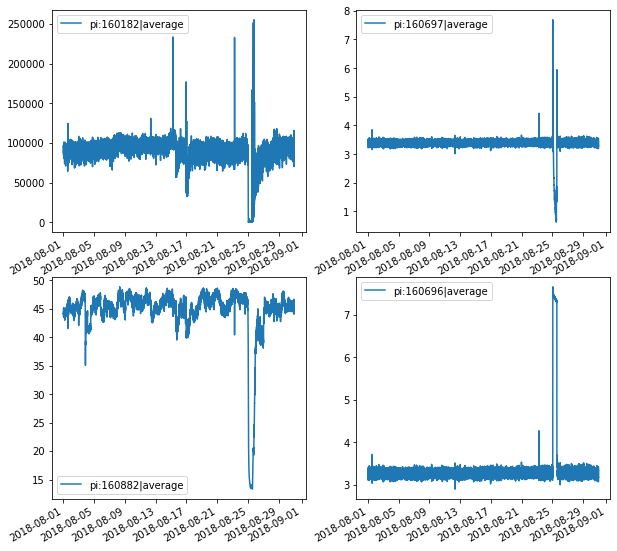

In [38]:
cols = datapoints_df.columns
from matplotlib import pyplot as plt
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
for i, col in enumerate(cols):
    datapoints_df.loc[:, [col]].plot(ax=axes.ravel()[i])

In [35]:
axes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f00fbd44190>,
      dtype=object)

# **Gatheting Training Data**

In [68]:
train_x = datapoints_df[in_ts_exids].to_numpy()
train_y = datapoints_df[out_ts_exid].to_numpy()
train_x

array([[9.11209185e+04, 3.37437621e+00, 4.41848626e+01],
       [8.62599752e+04, 3.39596638e+00, 4.42324197e+01],
       [9.07506657e+04, 3.41010093e+00, 4.41614384e+01],
       ...,
       [1.09582724e+05, 3.19481165e+00, 4.42923385e+01],
       [1.01517415e+05, 3.19248060e+00, 4.45944329e+01],
       [9.55404161e+04, 3.29910375e+00, 4.48133932e+01]])

In [63]:
predict_start_date = train_end_date
# use 1 hour of training data
predict_end_date = train_end_date + timedelta(hours=1)
predict_df = client.datapoints.retrieve_dataframe(
    external_id = ts_exids,
    aggregates=['average'],
    granularity='1m',
    start=predict_start_date,
    end= predict_end_date,
    include_aggregate_name=False)

predict_df.fillna(method='ffill', inplace=True)
predict_df.head()

,pi:160182,pi:160697,pi:160882,pi:160696
2018-08-31 00:00:00,96596.397652,3.390761,44.822433,3.266866
2018-08-31 00:01:00,92941.748459,3.382212,44.879119,3.259393
2018-08-31 00:02:00,100634.003031,3.477319,45.053927,3.348573
2018-08-31 00:03:00,103948.895082,3.434556,45.404786,3.305596
2018-08-31 00:04:00,101079.342794,3.348590,45.698323,3.222974


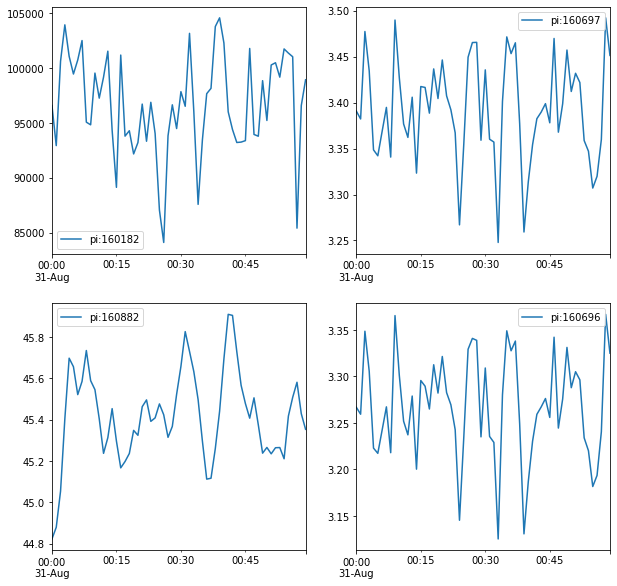

In [66]:
cols = predict_df.columns

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
for i, col in enumerate(cols):
  predict_df.plot(y=col, ax=axes.ravel()[i])

# **Create a Basic Linear Regression Model**

The Mean Squared Error of our forecasts is 0.0112
The R2 score of our forecasts is -2.7284


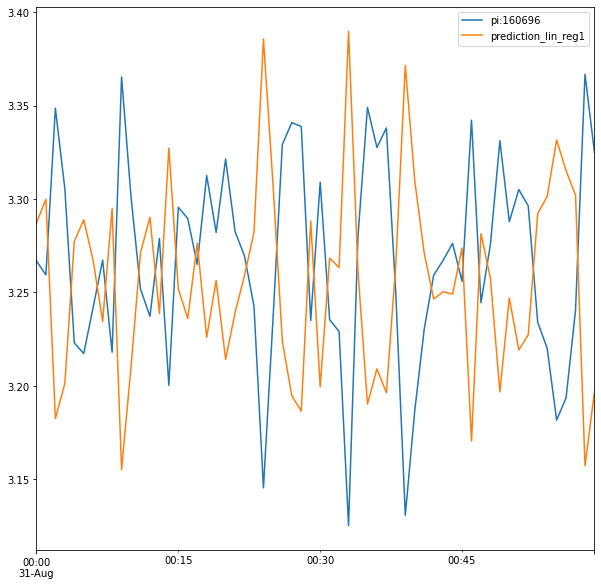

In [70]:
import numpy as np
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
lin_reg = LinearRegression() 
lin_reg.fit(train_x, train_y) 

X = predict_df[in_ts_exids].values 
predict_df["prediction_lin_reg1"] = lin_reg.predict(X) 

# print out mse of the prediction 


mse = mean_squared_error(predict_df[out_ts_exid], predict_df["prediction_lin_reg1"]) 
r2_s = r2_score(predict_df[out_ts_exid], predict_df["prediction_lin_reg1"]) 
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 4))) 
print('The R2 score of our forecasts is {}'.format(round(r2_s, 4))) 

predict_df.plot(y=[out_ts_exid, "prediction_lin_reg1"], figsize=(10, 10))

The Mean Squared Error on the training data is 0.0112
The R2 score of our training data is -2.7284


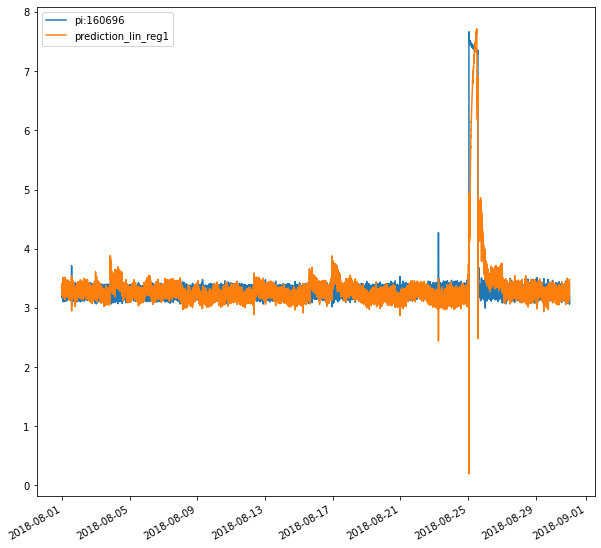

In [72]:
lin_reg = LinearRegression() 
lin_reg.fit(train_x, train_y) 

X = datapoints_df[in_ts_exids].values 
datapoints_df["prediction_lin_reg1"] = lin_reg.predict(X) 

# print out mse of the prediction 
mse = mean_squared_error(predict_df[out_ts_exid], predict_df["prediction_lin_reg1"]) 
r2_s = r2_score(predict_df[out_ts_exid], predict_df["prediction_lin_reg1"]) 
print('The Mean Squared Error on the training data is {}'.format(round(mse, 4))) 
print('The R2 score of our training data is {}'.format(round(r2_s, 4))) 

datapoints_df.plot(y=[out_ts_exid, "prediction_lin_reg1"], figsize=(10, 10))

# **Anomalous Period**

In [73]:
datapoints_df['state'] = (datapoints_df[out_ts_exid]< 4)*1 
predict_df['state'] = (predict_df[out_ts_exid]< 4)*1

The Mean Squared Error of our forecasts is 0.0021
The R2 score of our forecasts is 0.2865


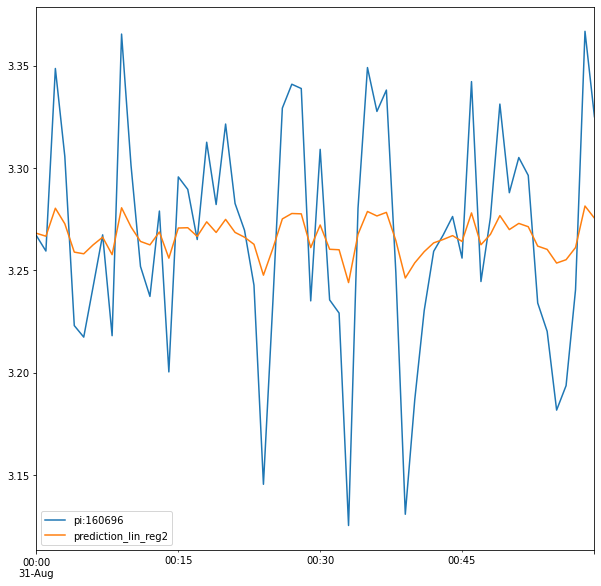

In [74]:
train_X2 = datapoints_df[in_ts_exids + ['state']].values 

lin_reg = LinearRegression() 
lin_reg.fit(train_X2, train_y) 
X = predict_df[in_ts_exids + ['state']].values 
predict_df["prediction_lin_reg2"] = lin_reg.predict(X) 

# print out mse of the prediction 
mse = mean_squared_error(predict_df[out_ts_exid], predict_df["prediction_lin_reg2"]) 
r2_s = r2_score(predict_df[out_ts_exid], predict_df["prediction_lin_reg2"]) 
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 4))) 
print('The R2 score of our forecasts is {}'.format(round(r2_s, 4))) 

predict_df.plot(y=[out_ts_exid, "prediction_lin_reg2"], figsize=(10, 10))

The Mean Squared Error on the training data is 0.0036
The R2 score of our training data is 0.9882


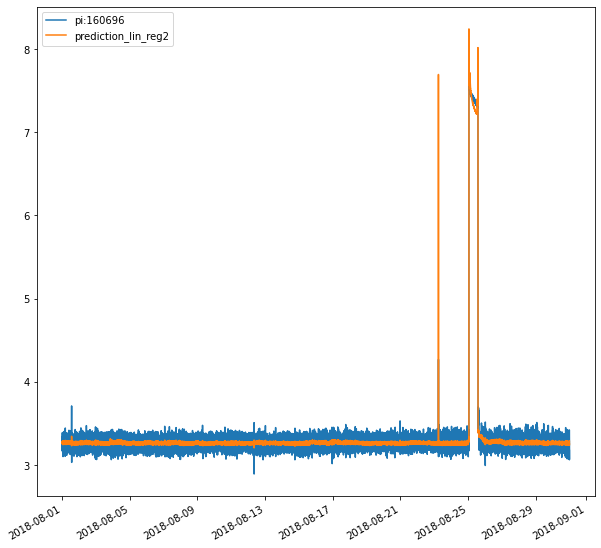

In [75]:
lin_reg = LinearRegression() 
lin_reg.fit(train_X2, train_y) 

X = datapoints_df[in_ts_exids + ['state']].values 
datapoints_df["prediction_lin_reg2"] = lin_reg.predict(X) 

# print out mse of the prediction 
mse = mean_squared_error(datapoints_df[out_ts_exid], datapoints_df["prediction_lin_reg2"]) 
r2_s = r2_score(datapoints_df[out_ts_exid], datapoints_df["prediction_lin_reg2"]) 
print('The Mean Squared Error on the training data is {}'.format(round(mse, 4))) 
print('The R2 score of our training data is {}'.format(round(r2_s, 4))) 

datapoints_df.plot(y=[out_ts_exid, "prediction_lin_reg2"], figsize=(10, 10))

# **Removing Outliers**

In [76]:
import pandas as pd
quantiles = [0.95, 0.975, 0.98, 0.99] 
quantiles_df = pd.DataFrame( 
     {
          "quantile": quantiles, 
          "value": np.quantile(datapoints_df[out_ts_exid], q=quantiles), 
     } 
) 

quantiles_df 


,quantile,value
0,0.950,3.372005
1,0.975,3.414939
2,0.980,3.503425
3,0.990,7.387873


The Mean Squared Error of our forecasts is 2e-06
The R2 score of our forecasts is 0.999497


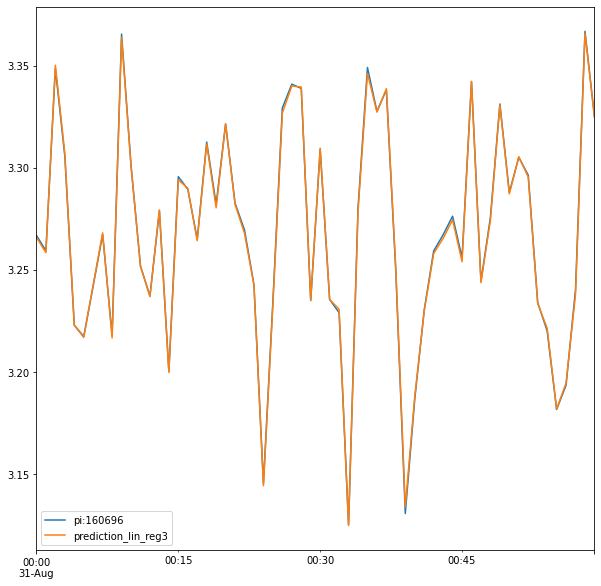

In [80]:
datapoints_df_adj = datapoints_df.loc[datapoints_df[out_ts_exid] < 4, :]

train_X_adj = datapoints_df_adj[in_ts_exids].values 
train_y_adj = datapoints_df_adj[out_ts_exid].values 

lin_reg = LinearRegression() 
lin_reg.fit(train_X_adj, train_y_adj) 

X = predict_df[in_ts_exids].values 
predict_df["prediction_lin_reg3"] = lin_reg.predict(X) 

# print out mse of the prediction 
mse = mean_squared_error(predict_df[out_ts_exid], predict_df["prediction_lin_reg3"]) 
r2_s = r2_score(predict_df[out_ts_exid], predict_df["prediction_lin_reg3"]) 
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 6))) 
print('The R2 score of our forecasts is {}'.format(round(r2_s, 6))) 

predict_df.plot(y=[out_ts_exid, "prediction_lin_reg3"], figsize=(10, 10))

# **Anomaly Detection**

# **Puzzle**

In [81]:
client.assets.retrieve(id=928299407571359)

,value
external_id,WMT:23-CB-9129B
name,23-CB-9129B
parent_id,3904753668320840
parent_external_id,WMT:23-1ST STAGE COMP DRY GAS SEAL SYS-PH
description,VRD - 1ST STAGE COMPRESSOR NITROGEN FILTER B
id,928299407571359
created_time,0
last_updated_time,1659105551785
root_id,6687602007296940
ELC_STATUS_ID,1211


In [82]:
client.assets.retrieve(id=3257705896277160)

,value
external_id,WMT:23-YE-96117-01
name,23-YE-96117-01
parent_id,3117826349444493
parent_external_id,WMT:23-DB-9101
description,VRD - PH 1STSTGGEAR 1 JOURNBRG DE
id,3257705896277160
created_time,0
last_updated_time,1659105575778
root_id,6687602007296940
ELC_STATUS_ID,1211


In [83]:
client.assets.retrieve(id=3810759783087892)

,value
external_id,WMT:60-EN-9010B+29A1
name,60-EN-9010B+29A1
parent_id,3195126756929465
parent_external_id,WMT:23-GK-9107B-M01
description,VRD - 1ST STAGE COMPRESSOR ENCLOSURE COOLING U...
id,3810759783087892
created_time,0
last_updated_time,1659105581079
root_id,6687602007296940
ELC_STATUS_ID,1211


In [85]:
client.assets.retrieve_subtree(external_id='WMT:23-PI-96145')

,external_id,name,parent_id,parent_external_id,description,metadata,id,created_time,last_updated_time,root_id
0,WMT:23-PI-96145,23-PI-96145,6800693372982143,WMT:23-CX-9101,VRD - PH 1ST STAGE COMP. PURGE UNIT,"{'ELC_STATUS_ID': '1211', 'SOURCE_DB': 'workma...",1392670717055474,0,1659105556643,6687602007296940


In [84]:
client.assets.search(name='23-PI-96145')

,external_id,name,parent_id,parent_external_id,description,metadata,id,created_time,last_updated_time,root_id
0,WMT:23-PI-96145,23-PI-96145,6800693372982143,WMT:23-CX-9101,VRD - PH 1ST STAGE COMP. PURGE UNIT,"{'ELC_STATUS_ID': '1211', 'SOURCE_DB': 'workma...",1392670717055474,0,1659105556643,6687602007296940
1,WMT:23-PI-96154,23-PI-96154,5062762658885662,WMT:23-CB-9129A,VRD - PH 1STSTGCOMP SEAL BUF GAS,"{'ELC_STATUS_ID': '1211', 'RES_ID': '487973', ...",1418893254875430,0,1659105556796,6687602007296940
2,WMT:23-PI-96185,23-PI-96185,2357112351749647,WMT:23-TX-9103,VRD - PH 1STSTG COMP OIL RESERVOIR,"{'ELC_STATUS_ID': '1211', 'SOURCE_DB': 'workma...",3287965432018879,0,1659105576098,6687602007296940
3,WMT:23-NI-96144,23-NI-96144,6191827428964450,WMT:23-KA-9101-M01,SOFT TAG VRD - PH 1STSTGCMP MTR PARTIAL DISCH,"{'ELC_STATUS_ID': '1211', 'SOURCE_DB': 'workma...",6231088176695610,0,1659105605463,6687602007296940
4,WMT:23-PDI-96143,23-PDI-96143,3736502293435209,WMT:23-PDT-96143,SOFT TAG VRD - PH 1STSTG COMPR ENCL AIRFILTER,"{'ELC_STATUS_ID': '1211', 'SOURCE_DB': 'workma...",2802944442214768,0,1659105570983,6687602007296940
...,...,...,...,...,...,...,...,...,...,...
95,WMT:23-FO-96171,23-FO-96171,2539007469802785,WMT:23-FE-9122,VRD - PH 1STSTG SEAL GAS,"{'ELC_STATUS_ID': '1211', 'SOURCE_DB': 'workma...",5439014409423235,0,1659105597387,6687602007296940
96,WMT:23-FO-96178,23-FO-96178,7372310232665628,WMT:23-1ST STAGE COMPRESSOR-PH,VRD - PH 1STSTG COMPR. DRAIN,"{'ELC_STATUS_ID': '1225', 'SOURCE_DB': 'workma...",7522731957866845,0,1659105618744,6687602007296940
97,WMT:23-FO-96180,23-FO-96180,8790823573167638,WMT:23-CB-9103A,VRD - PH 1STSTG OIL FILTER,"{'ELC_STATUS_ID': '1211', 'SOURCE_DB': 'workma...",3247901777876513,0,1659105575602,6687602007296940
98,WMT:23-FO-96186,23-FO-96186,2137557577165478,WMT:23-1ST STAGE COMP LUBE OIL SYS-PH,VRD - PH 1STSTG LUBE OIL SUPP,"{'ELC_STATUS_ID': '1211', 'SOURCE_DB': 'workma...",1305424889591533,0,1659105555382,6687602007296940
